# Final Year Project - Intelligent Health Monitoring System
#### by: Koo Chia Meng, A0165275Y

### FUZZY LOGIC MODEL - TESTING WITH DATA FROM PERSON1 & PERSON2

The previously save Fuzzy models will be used to view the health score of PERSON 1 and 2.

For Fuzzy Logic, the library "skfuzzy" was used. See https://pythonhosted.org/scikit-fuzzy/ for documentations. 
Basic Memembership functions like Triangular and Trapezoidal functions will be used.


In [32]:
# Import library

import numpy as np
import skfuzzy as fuzz # scikit-fuzzy (Version 2.0)
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os

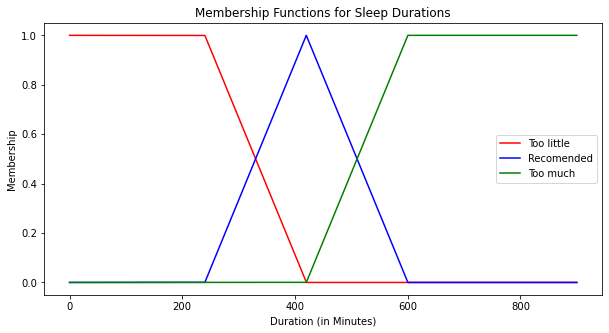

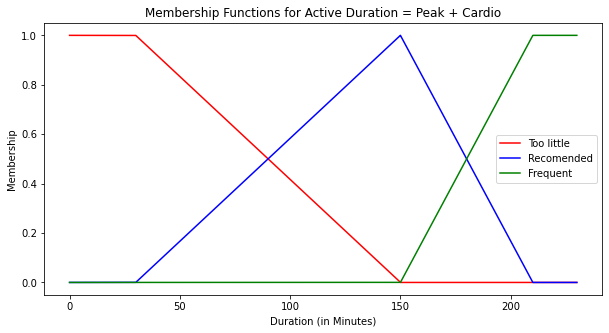

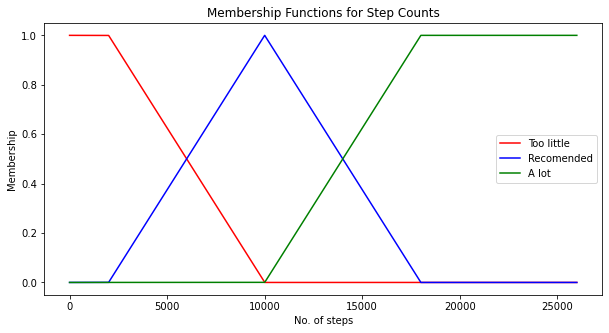

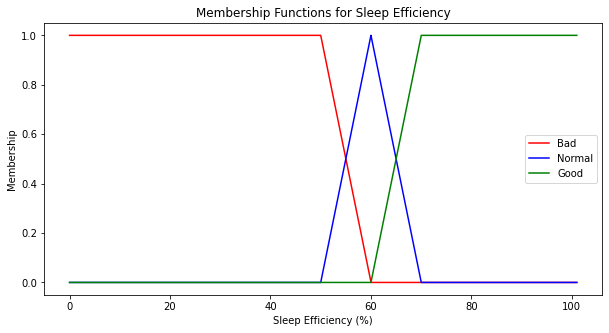

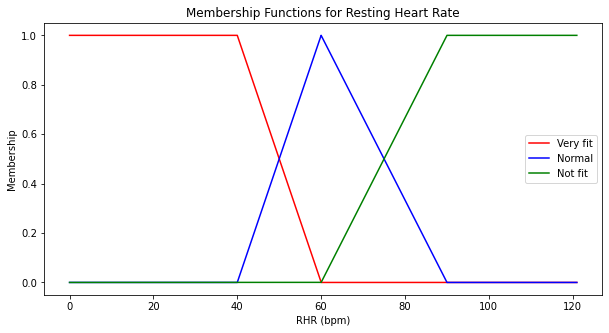

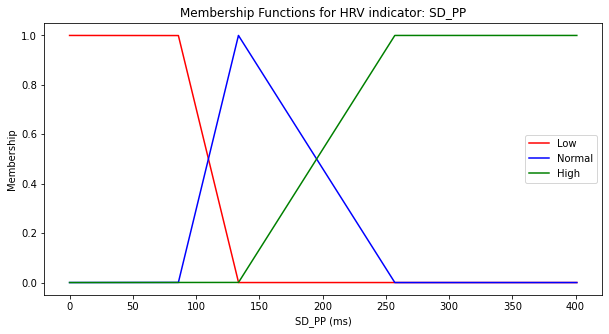

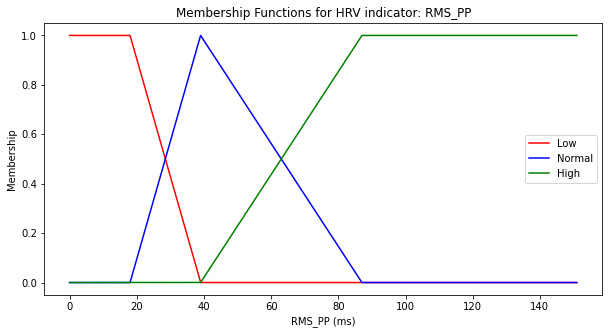

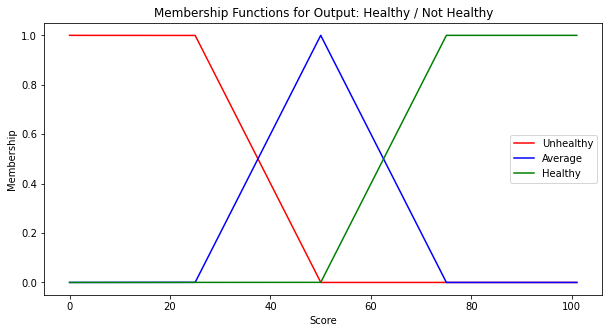

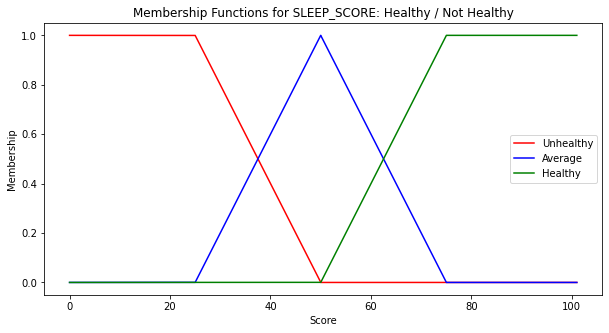

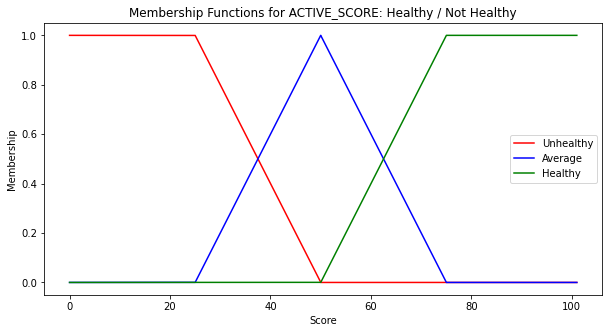

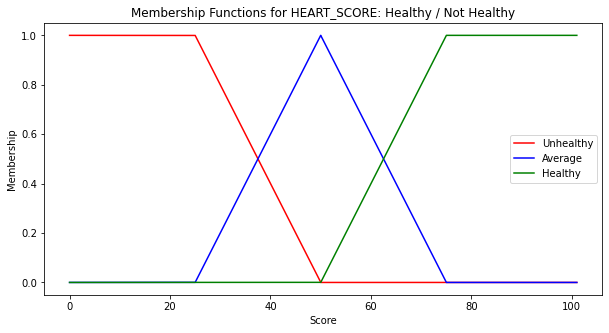


The Aggregated Health Score is: 35.563

Degree:
Health Unhealthy: 0.577
Health Average: 0.423
Health Healthy: 0.0


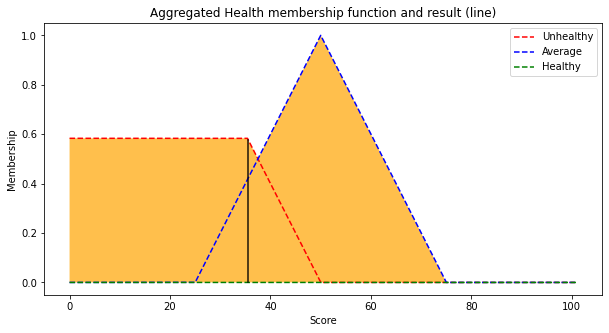

HEALTH STATUS:


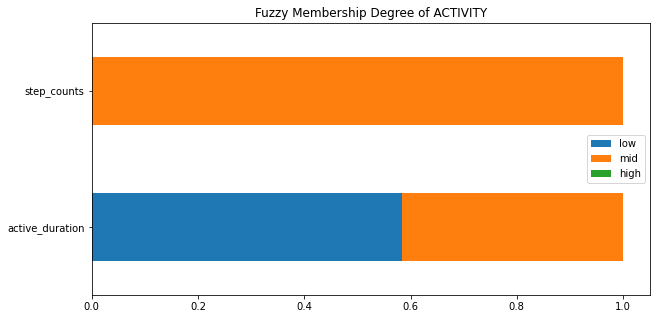

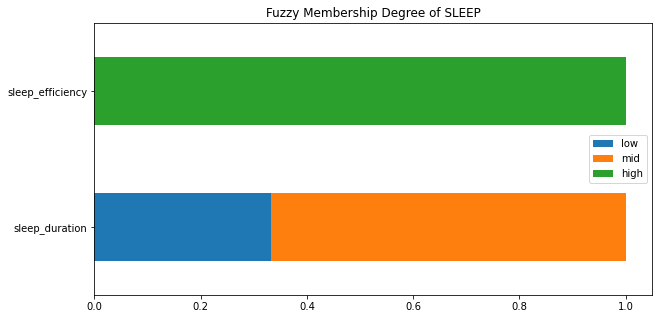

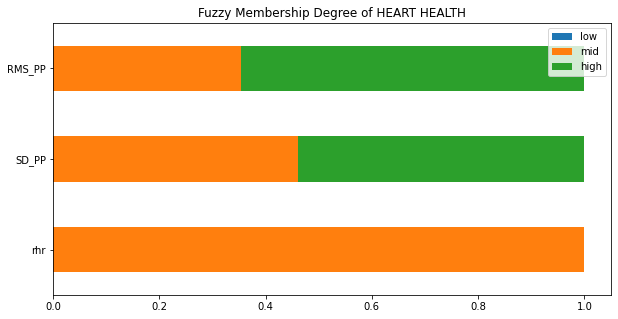

RECOMENDATIONS:

Activity :
active_duration     .....	OK
step_counts         .....	OK

Sleep :
sleep_duration      .....	OK
sleep_efficiency    .....	OK

Heart Health :
rhr                 .....	OK
SD_PP               .....	OK
RMS_PP              .....	OK


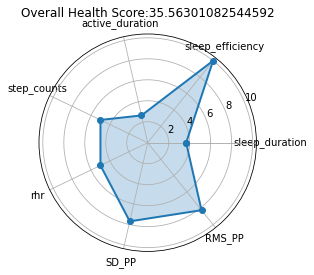


The Aggregated Health Score is: 38.109

Degree:
Health Unhealthy: 0.476
Health Average: 0.524
Health Healthy: 0.0

Breakdown Score:
sleep_score: 39.251
active_score: 46.961
heart_score: 50.0


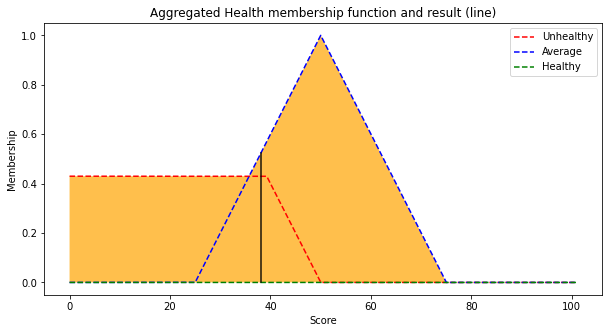

HEALTH STATUS:


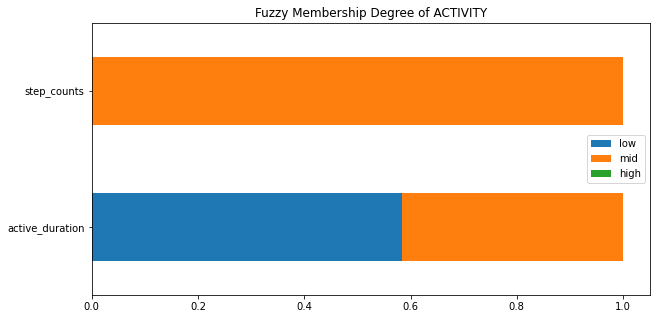

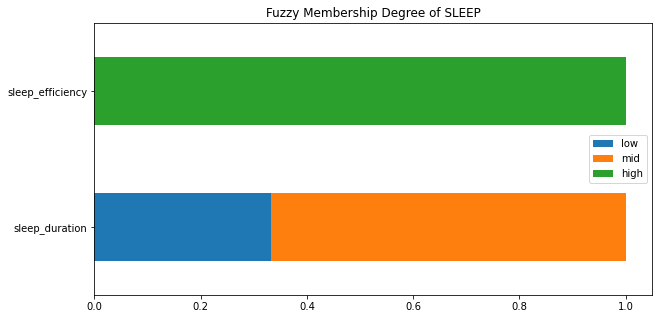

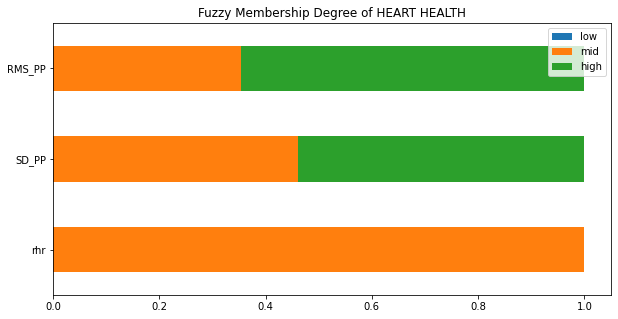

RECOMENDATIONS:

Activity :
active_duration     .....	OK
step_counts         .....	OK

Sleep :
sleep_duration      .....	OK
sleep_efficiency    .....	OK

Heart Health :
rhr                 .....	OK
SD_PP               .....	OK
RMS_PP              .....	OK


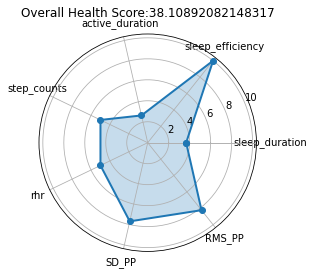

In [33]:
%run FYP_FITBIT_5-2_Saving_Fuzzy_Logic_Model.ipynb # line needed to reuse the FUZZY MODEL created previously

In [34]:
%run FYP_SUBJECTS_CLASS.ipynb # line needed to reuse the SUBJECT class created for OOP

### Loading Subjects from PICKLE

In [35]:
current_directory = os.getcwd()
folder = "PERSON1" # CHANGE HERE
file = "PERSON1_DATA_31JUL.pickle" # CHANGE HERE
f_path = os.path.join(current_directory,folder,file)
                      
with open(f_path,'rb') as f:
    PERSON1 = pickle.load(file=f)

In [36]:
PERSON1.profile

{'age': 28, 'gender': 'MALE', 'height': 170.0, 'weight': 75.0}

In [37]:
current_directory = os.getcwd()
folder = "PERSON2" # CHANGE HERE
file = "PERSON2_DATA_31JUL.pickle" # CHANGE HERE
f_path = os.path.join(current_directory,folder,file)
                      
with open(f_path,'rb') as f:
    PERSON2 = pickle.load(file=f)

In [38]:
PERSON2.profile

{'age': 27, 'gender': 'MALE', 'height': 176.0, 'weight': 65.0}

### Loading Previously Processed DFs from PICKLE

In [39]:
current_directory = os.getcwd()
folder = os.path.join("PERSON1","31JUL") # CHANGE HERE
folder_path = os.path.join(current_directory,folder)

# LOAD FROM PICKLE:

unpickle = {}
unpickle_list = [
                # Daily Resting Heart Rate DF:
                'df_resting_hr',

                # Daily Heart Rate Zones (HR Activities) DF:
                'df_hr_calories',

                # Intra-day Heart Rate DF:
                'df_intraday_hr',

                # Sleep Durations DF
                'df_sleep_durations',

                # Detailed intra Sleep Stages DF
                'df_intra_sleep_stage',

                # Daily Step activities DF:
                'df_activity_steps',
    
                # Derived HRV Stats DFs:
                'df_hrv_stats_full_day',
                'df_hrv_stats_AM',
                'df_hrv_stats_PM'
]

for i in unpickle_list:
    file = os.path.join(folder_path, str(i) + '.pickle')
    with open(file,'rb') as f:
        unpickle[i] = pickle.load(file=f)

PERSON1.df_resting_hr = unpickle['df_resting_hr']
PERSON1.df_hr_calories = unpickle['df_hr_calories']
PERSON1.df_intraday_hr = unpickle['df_intraday_hr']
PERSON1.df_sleep_durations = unpickle['df_sleep_durations']
PERSON1.df_intra_sleep_stage = unpickle['df_intra_sleep_stage']
PERSON1.df_activity_steps = unpickle['df_activity_steps']
PERSON1.df_hrv_stats_full_day = unpickle['df_hrv_stats_full_day']
PERSON1.df_hrv_stats_AM = unpickle['df_hrv_stats_AM']
PERSON1.df_hrv_stats_PM = unpickle['df_hrv_stats_PM']


In [40]:
current_directory = os.getcwd()
folder = os.path.join("PERSON2","31JUL") # CHANGE HERE
folder_path = os.path.join(current_directory,folder)

# LOAD FROM PICKLE:

unpickle = {}
unpickle_list = [
                # Daily Resting Heart Rate DF:
                'df_resting_hr',

                # Daily Heart Rate Zones (HR Activities) DF:
                'df_hr_calories',

                # Intra-day Heart Rate DF:
                'df_intraday_hr',

                # Sleep Durations DF
                'df_sleep_durations',

                # Detailed intra Sleep Stages DF
                'df_intra_sleep_stage',

                # Daily Step activities DF:
                'df_activity_steps',
    
                # Derived HRV Stats DFs:
                'df_hrv_stats_full_day',
                'df_hrv_stats_AM',
                'df_hrv_stats_PM'
]

for i in unpickle_list:
    file = os.path.join(folder_path, str(i) + '.pickle')
    with open(file,'rb') as f:
        unpickle[i] = pickle.load(file=f)

PERSON2.df_resting_hr = unpickle['df_resting_hr']
PERSON2.df_hr_calories = unpickle['df_hr_calories']
PERSON2.df_intraday_hr = unpickle['df_intraday_hr']
PERSON2.df_sleep_durations = unpickle['df_sleep_durations']
PERSON2.df_intra_sleep_stage = unpickle['df_intra_sleep_stage']
PERSON2.df_activity_steps = unpickle['df_activity_steps']
PERSON2.df_hrv_stats_full_day = unpickle['df_hrv_stats_full_day']
PERSON2.df_hrv_stats_AM = unpickle['df_hrv_stats_AM']
PERSON2.df_hrv_stats_PM = unpickle['df_hrv_stats_PM']

In [41]:
PERSON_LIST = [PERSON1,PERSON2] # Declare a list of person to create

In [42]:
df_input_list = []

for subject in PERSON_LIST:

    combine_list = [
        subject.df_sleep_durations.sort_index()['duration'],
        subject.df_sleep_durations.sort_index()['efficiency'],
        subject.df_hr_calories.sort_index().minutes_Cardio + PERSON1.df_hr_calories.sort_index().minutes_Peak,
        subject.df_activity_steps.sort_index()['step_count'],
        subject.df_resting_hr.sort_index()['restingHeartRate'],
        subject.df_hrv_stats_full_day.sort_index()['SD_PP_interval'],
        subject.df_hrv_stats_full_day.sort_index()['RMS_PP_diff']
    ]

    df_input = pd.concat(combine_list,axis=1).dropna()
    df_input.columns = ['sleep_duration','sleep_efficiency','active_duration','step_counts','rhr','SD_PP','RMS_PP']
    df_input_list.append(df_input)
    
df_input

,sleep_duration,sleep_efficiency,active_duration,step_counts,rhr,SD_PP,RMS_PP
2020-04-08,430.0,97.0,25.0,9494.0,57.0,177.634318,18.543749
2020-05-26,505.0,98.0,1.0,2837.0,54.0,200.720649,21.508687
2020-05-27,558.0,95.0,0.0,1061.0,54.0,169.841985,19.933196
2020-06-01,356.0,95.0,17.0,4877.0,57.0,156.477428,18.131582
2020-06-02,462.0,96.0,0.0,8344.0,57.0,166.310498,17.898238
2020-06-03,263.0,93.0,3.0,3807.0,58.0,151.880574,17.513763
2020-06-05,428.0,99.0,14.0,11616.0,59.0,189.020688,16.599395
2020-06-08,448.0,96.0,29.0,4269.0,58.0,176.336771,17.333526
2020-06-09,545.0,96.0,15.0,4296.0,57.0,186.186142,18.804638
2020-06-10,218.0,96.0,0.0,2480.0,57.0,130.415447,16.291203


### Calculating Score & Recommendation for single day

Health Score for the Day: PERSON 1 - 2020-07-31

METHOD 1:

The Aggregated Health Score is: 31.009

Degree:
Health Unhealthy: 0.76
Health Average: 0.24
Health Healthy: 0.0


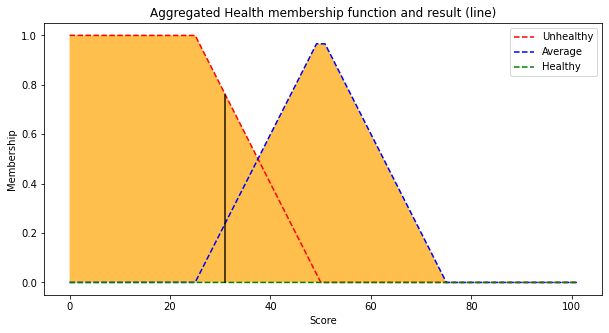

Health Score for the Day: PERSON 1 - 2020-07-31
METHOD 2:

The Aggregated Health Score is: 27.836

Degree:
Health Unhealthy: 0.887
Health Average: 0.113
Health Healthy: 0.0

Breakdown Score:
sleep_score: 23.727
active_score: 31.009
heart_score: 35.743


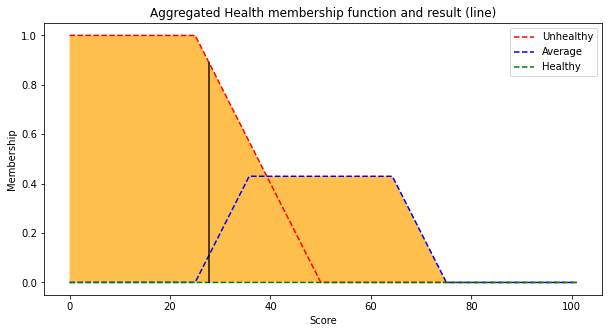

HEALTH STATUS:


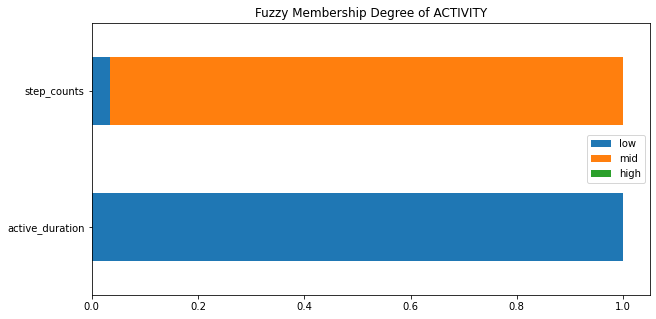

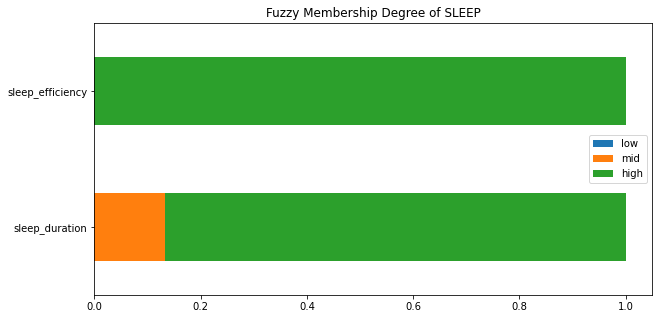

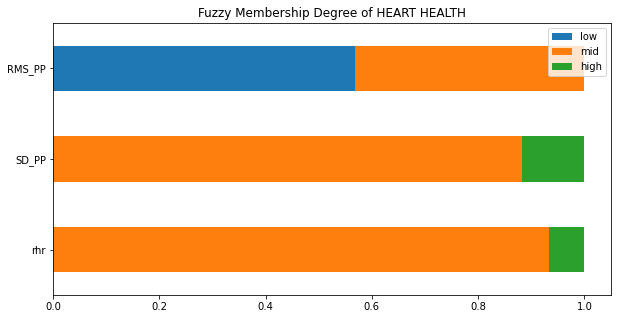

RECOMENDATIONS:

Activity :
active_duration     .....	Needs to improve
step_counts         .....	OK

Sleep :
sleep_duration      .....	Sleep too much
sleep_efficiency    .....	OK

Heart Health :
rhr                 .....	OK
SD_PP               .....	OK
RMS_PP              .....	OK


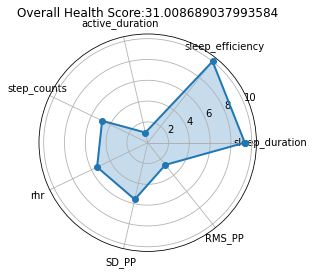

In [43]:
# Finding Score for each day:

Date_select = "2020-07-31" # Change Date Here
person = 1 # Change to 2 for PERSON 2

input_x = df_input_list[person-1] 

try:
    # Input Values:
    INPUT_DICT = {
    'sleep_duration' : input_x.loc[Date_select,'sleep_duration'],
    'sleep_efficiency' : input_x.loc[Date_select,'sleep_efficiency'],
    'active_duration' : input_x.loc[Date_select,'active_duration'],
    'step_counts' : input_x.loc[Date_select,'step_counts'],
    'rhr' : input_x.loc[Date_select,'rhr'],
    'SD_PP' : input_x.loc[Date_select,'SD_PP'],
    'RMS_PP' : input_x.loc[Date_select,'RMS_PP']
    }

    print("Health Score for the Day: PERSON",person,"-",Date_select)

    # find the Health Score - Method 1:
    print("\nMETHOD 1:")
    METHOD_1.fuzzify_input(INPUT_DICT)
    health_score_m1 = METHOD_1.get_health_score_m1()
    METHOD_1.print_health_score(method=1)

    print("Health Score for the Day: PERSON",person,"-",Date_select)

    # find the Health Score - Method 2:
    print("METHOD 2:")
    METHOD_2.fuzzify_input(INPUT_DICT)
    health_score_m2 = METHOD_2.get_health_score_m2()
    METHOD_2.print_health_score(method=2)

    # The recomendation for method 1 and 2 is the same
    METHOD_1.recomend()
    
except:
    print("\nRecord not found.")

### Comparing Score Trends by Days

In [44]:
# Finding Score trends by days:

health_score_list= []

for input_x in df_input_list:
    health_score_m1, health_score_m2 = [],[]
    
    for i in range(len(input_x)):
        # Input Values:
        INPUT_DICT = {
        'sleep_duration' : input_x.iloc[i,0],
        'sleep_efficiency' : input_x.iloc[i,1],
        'active_duration' : input_x.iloc[i,2],
        'step_counts' : input_x.iloc[i,3],
        'rhr' : input_x.iloc[i,4],
        'SD_PP' : input_x.iloc[i,5],
        'RMS_PP' : input_x.iloc[i,6]
        }

        # find the Health Score - Method 1:
        METHOD_1.fuzzify_input(INPUT_DICT)
        health_score_m1.append(METHOD_1.get_health_score_m1())

        # find the Health Score - Method 2:
        METHOD_2.fuzzify_input(INPUT_DICT)
        health_score_m2.append(METHOD_2.get_health_score_m2())
            
    # reindexing 
    pd_health_score_m1 = pd.Series(health_score_m1,index=input_x.index)
    pd_health_score_m2 = pd.Series(health_score_m2,index=input_x.index)

    results = pd.concat([pd_health_score_m1,pd_health_score_m2],axis=1)
    results.columns = ['Method1','Method2']

    health_score_list.append(results)


PERSON 1


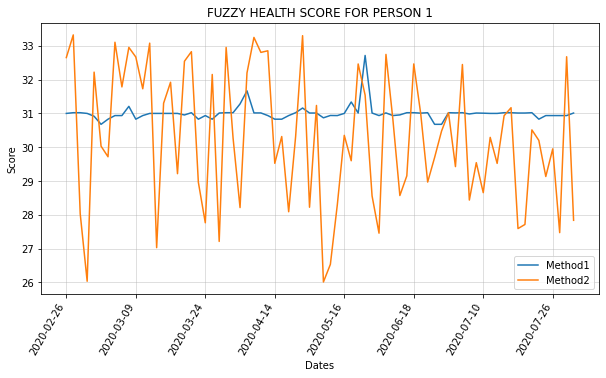


PERSON 2


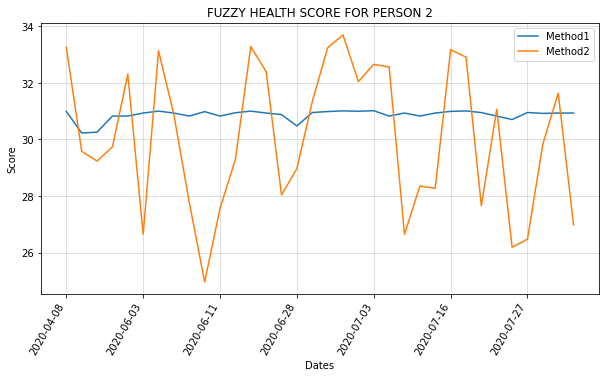

In [45]:
# Plot to visualise the health score

for i in range(2):
    print("\nPERSON",i+1)
    print('='*10)

    health_score_list[i].plot(figsize=(10,5))
    plt.xticks(rotation=60,ha='right')
    plt.title("FUZZY HEALTH SCORE FOR PERSON "+str(i+1))
    plt.ylabel('Score')
    plt.xlabel('Dates')
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()

### Comparing Score Trends in Months

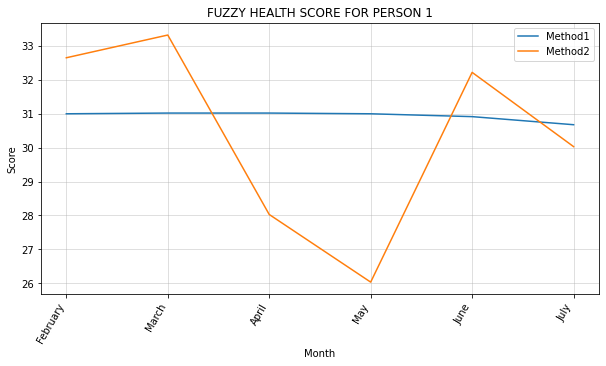

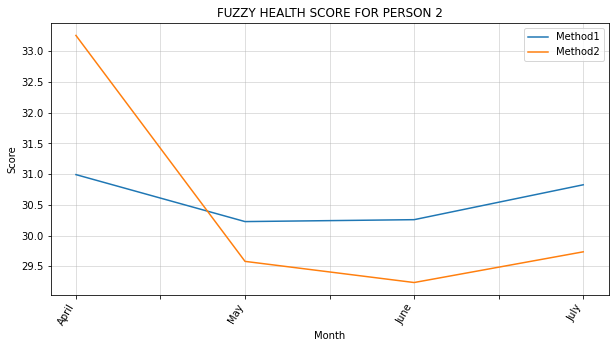

In [46]:

health_score_list= []

for x,input_x in enumerate(df_input_list):

    input_x.index = pd.to_datetime(input_x.index)
    input_x['month'] = input_x.index.month_name()

    # Finding Score for each day:
    health_score_m1, health_score_m2 = [],[]

    for i in range(len(input_x.groupby('month').mean())):
        # Input Values:
        INPUT_DICT = {
        'sleep_duration' : input_x.iloc[i,0],
        'sleep_efficiency' : input_x.iloc[i,1],
        'active_duration' : input_x.iloc[i,2],
        'step_counts' : input_x.iloc[i,3],
        'rhr' : input_x.iloc[i,4],
        'SD_PP' : input_x.iloc[i,5],
        'RMS_PP' : input_x.iloc[i,6]
        }

        # find the Health Score - Method 1:
        METHOD_1.fuzzify_input(INPUT_DICT)
        health_score_m1.append(METHOD_1.get_health_score_m1())

        # find the Health Score - Method 2:
        METHOD_2.fuzzify_input(INPUT_DICT)
        health_score_m2.append(METHOD_2.get_health_score_m2())

    # Plot to visualise the health score

    # reindexing 
    health_score_m1 = pd.Series(health_score_m1,index=input_x.month.unique())
    health_score_m2 = pd.Series(health_score_m2,index=input_x.month.unique())

    results = pd.concat([health_score_m1,health_score_m2],axis=1)
    results.columns = ['Method1','Method2']

    results.plot(figsize=(10,5))
    plt.xticks(rotation=60,ha='right')
    plt.ylabel('Score')
    plt.xlabel('Month')
    plt.grid(alpha=0.5)
    plt.title("FUZZY HEALTH SCORE FOR PERSON "+str(x+1))
    plt.legend()
    plt.show()